# 07 데이터 정제  - 빠진 데이터, 이상한 데이터 제거하기

## 파이썬 운영환경을 사전에 기본 점검하기

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})
%config InlineBackend.figure_format = 'retina'

### import os 명령을 통하여 os안에 있는 기본명령을 사용할 수가 있다.  
- 기본 os 명령을 사용하려면 <font color='blue'>**import os**</font>명령을 사용한다.  
- *os.* 상태에서 **<탭>키**를 쳐서 부속된 속성(attribute)을 확인할 수가 있다.   
- **작업디렉토리변경(chdir), 작업디렉토리생성(mkdir)** 등 기본적인 작업이 가능하다.    
- 파이썬은 디렉토리(폴더) 주소를 판별할 때에 \은 \\로 나타내야 하고 /는 그냥 한개만 사용하면 된다.  
  - 따라서 리눅스와 파일을 주고받아야 할 경우 경로를 /로 표시해 두는 것이 좋다.  

In [2]:
import os   # OS 명령을 기본 사용하기 위한 라이브러리  

os.getcwd()   # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data'

In [3]:
os.chdir('../python_Data/data')   # 상대경로 이동 

os.getcwd()           # 내가 현재 어느 폴더에 위치해 있는 지를 표시  

'C:\\Users\\A\\python_Data\\data'

### 파이썬 기본 경고메세지 처리(무시 OR 기본값) 하기

In [4]:
import warnings     # 파이썬 기본적인 경고메세지 처리하기     

warnings.filterwarnings(action='ignore')      # 기본적인 경고메세지 무시하기 
# warnings.filterwarnings(action='default')    # 기본적인 경고메세지 기본값으로 표시하기   

### 이 책에서 사용하는 소프트웨어 버전 

In [5]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__) 

import seaborn as sns  
print("Seaborn 버전:", sns.__version__) 

import sklearn as skl 
print("scikit-learn 버전:", skl.__version__)

Python 버전: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 2.1.1
matplotlib 버전: 3.7.2
NumPy 버전: 1.24.3
Seaborn 버전: 0.12.2
scikit-learn 버전: 1.3.0


## 07-1 빠진 데이터를 찾아라! - 결측치 정제하기

### 결측치 찾기
 - 누락된 값, 비어 있는 값 

#### 결측치 만들기

In [18]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan],
                   'name'  : ['hong', np.nan, 'kim', 'lee', 'hyun']})
df

,sex,score,name
0,M,5.0,hong
1,F,4.0,NaN
2,NaN,3.0,kim
3,M,4.0,lee
4,F,NaN,hyun


In [19]:
df['score'] + 100

0    105.0
1    104.0
2    103.0
3    104.0
4      NaN
Name: score, dtype: float64

#### 결측치 확인하기

In [20]:
# 데이터중 기본 결측치 여부를 확인한다.   
# 해당 값이 결측치인 경우는 True, 결측치가 아닌 경우에는 False로 표시된다.  

pd.isna(df)  # 결측치 확인

,sex,score,name
0,False,False,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


In [21]:
# 주어진 데이터 중에서 결측치가 있는 건수를 확인한다.   

pd.isna(df).sum()  # 결측치 빈도 확인

sex      1
score    1
name     1
dtype: int64

### 결측치 제거하기
#### 결측치 있는 행 제거하기

In [22]:
# 원시 데이터(source) 
df

,sex,score,name
0,M,5.0,hong
1,F,4.0,NaN
2,NaN,3.0,kim
3,M,4.0,lee
4,F,NaN,hyun


In [14]:
# 원시 데이터(source) 중 score 컬럼에 결측치가 있는 부분을 제거 

df.dropna(subset = ['score'])  # score 결측치 제거

In [23]:
# 원시 데이터(source) 중 score 컬럼에 결측치가 있는 부분을 제거 
# 제거된 결과물 -> df_nomiss 

df_nomiss = df.dropna(subset = ['score'])  # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                     # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

#### 여러 변수에 결측치 없는 데이터 추출하기

In [24]:
df_nomiss = df.dropna(subset = ['score', 'sex', 'name'])  # score, sex 결측치 제거
df_nomiss

,sex,score,name
0,M,5.0,hong
3,M,4.0,lee


#### 결측치가 하나라도 있으면 제거하기 
- 위의 셀과 결과값이 서로 같음을 확인할 수가 있다.  

In [25]:
df_nomiss2 = df.dropna()  # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score,name
0,M,5.0,hong
3,M,4.0,lee


------------------------------------------------------------------------
#### (알아 두면 좋아요) 결측치 제거하지 않고 분석하기

In [26]:
df['score'].mean()

4.0

In [27]:
df['score'].sum()

16.0

In [28]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


------------------------------------------------------------------------
### 결측치 대체하기
#### 평균값으로 결측치 대체하기

In [30]:
exam = pd.read_csv('../data/exam.csv')           # 데이터 불러오기
exam.head(10)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [35]:
# 가져온 데이터중에 math에 2,7,14행의 값에 결측치를 할당 
exam.loc[[2, 7, 14], ['math']] = np.nan          # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [36]:
exam['math'].isna().sum()  # 결측치 빈도 확인

3

In [37]:
exam['math'].mean()

55.23529411764706

In [38]:
exam['math'] = exam['math'].fillna(55)  # math가 NaN이면 55로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [39]:
exam['math'].isna().sum()  # 결측치 빈도 확인

0

#### 결측치에 해당하는 값(2,7,14 행의 math값)에 55.0이 각각 할당 되었슴을 확인할 수가 있다.  

---
## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기
### 이상치 제거하기 - 존재할 수 없는 값
### 일정 범위를 벗어난 값, 예) 과목 점수 : 0<= jumsu 100>=

In [41]:
# 여기에서는 3이나 6은 이상치값으로 봅니다.

df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### 이상치 확인하기

In [42]:
#빈도표 생성하기
df['sex'].value_counts(sort = False).sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [43]:
df['score'].value_counts(sort = False).sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

#### 결측 처리하기

In [44]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [45]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [28]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']) \
       .groupby('sex') \
       .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


------------------------------------------------------------------------
#### (알아 두면 좋아요) `np.where()`는 문자와 `NaN`을 함께 반환할 수 없습니다.

In [46]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [48]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [51]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df['x2']

0      a
1      a
2    etc
3    etc
Name: x2, dtype: object

In [54]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)  
df['x2'] 

0      a
1      a
2    NaN
3    NaN
Name: x2, dtype: object

In [55]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [56]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### 이상치 제거하기 - 극단적인 값

#### 상자 그림으로 극단치 기준 정하기

##### 1. 상자 그림 살펴보기

<Axes: ylabel='hwy'>

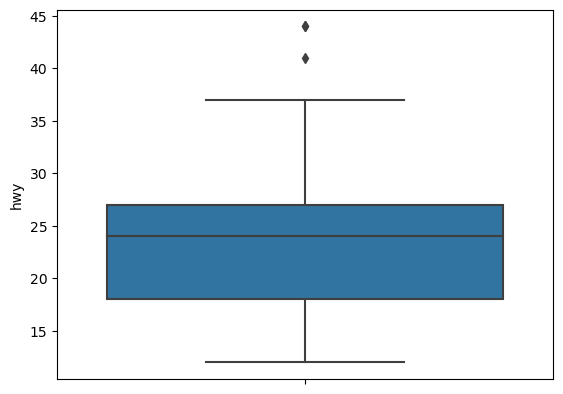

In [57]:
# mpg 샘플을 가져온다.  
mpg = pd.read_csv('../data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

##### 2.극단치 기준값 구하기

**(1) 1사분위수, 3사분위수 구하기**

In [58]:
pct25 = mpg['hwy'].quantile(.25)      # 1/4분위수(1/4 1쿼터 값) 
pct25

18.0

In [59]:
pct75 = mpg['hwy'].quantile(.75)      # 3/4분위수(3/4 3쿼터값)
pct75

27.0

**(2) IQR 구하기**

In [60]:
iqr = pct75 - pct25       # 3/4분위수 - 1/4분위수 : 실제 박스가 있는 부분만 , median
iqr

9.0

**(3) 하한, 상한 구하기**

In [61]:
pct25 - 1.5 * iqr  # 하한

4.5

In [62]:
pct75 + 1.5 * iqr  # 상한

40.5

##### 3. 극단치를 결측 처리하기

In [66]:
pd.set_option('display.max_rows', None)     # 모든 행 출력하도록 설정

In [67]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
print(mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

0      29.0
1      29.0
2      31.0
3      30.0
4      26.0
5      26.0
6      27.0
7      26.0
8      25.0
9      28.0
10     27.0
11     25.0
12     25.0
13     25.0
14     25.0
15     24.0
16     25.0
17     23.0
18     20.0
19     15.0
20     20.0
21     17.0
22     17.0
23     26.0
24     23.0
25     26.0
26     25.0
27     24.0
28     19.0
29     14.0
30     15.0
31     17.0
32     27.0
33     30.0
34     26.0
35     29.0
36     26.0
37     24.0
38     24.0
39     22.0
40     22.0
41     24.0
42     24.0
43     17.0
44     22.0
45     21.0
46     23.0
47     23.0
48     19.0
49     18.0
50     17.0
51     17.0
52     19.0
53     19.0
54     12.0
55     17.0
56     15.0
57     17.0
58     17.0
59     12.0
60     17.0
61     16.0
62     18.0
63     15.0
64     16.0
65     12.0
66     17.0
67     17.0
68     16.0
69     12.0
70     15.0
71     16.0
72     17.0
73     15.0
74     17.0
75     17.0
76     18.0
77     17.0
78     19.0
79     17.0
80     19.0
81     19.0
82     17.0
83  

3

In [68]:
pd.reset_option('display.max_rows')     # 행 출력 제한 되돌리기

##### 4. 결측치 제거하고 분석하기

In [69]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 정리하기

In [43]:
## 원시 데이터 불러오기  
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})

print('1. DataFrame df 의 상위 6행은 ?  ')
print(df.head())
print(); print()

## 1. 결측치 정제하기
pd.isna(df).sum()                                 # 결측치 확인 

df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거

print('2. df중 score,sex컬럼의 결측치를 제거한 df_nomiss중 상위 6행은 ? ')
print(df_nomiss.head())
print(); print()

## 2. 이상치 정제하기
# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수

iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy']) 

mpg_columns = ["manufacturer","model","displ","year","cyl","trans","cty","hwy"]
mpg_new = mpg[mpg_columns]

print('3. mpg중 고속도로연비(hwy)의 결측치를 제거(4.5 < hwy < 40.5에 속한 값)한 mpg_new의 값은 ?  ')
print(mpg_new.head(30))

1. DataFrame df 의 상위 6행은 ?  
   sex  score
0    1      5
1    2      4
2    1      3
3    3      4
4    2      2


2. df중 score,sex컬럼의 결측치를 제거한 df_nomiss중 상위 6행은 ? 
   sex  score
0    1      5
1    2      4
2    1      3
3    3      4
4    2      2


3. mpg중 고속도로연비(hwy)의 결측치를 제거(4.5 < hwy < 40.5에 속한 값)한 mpg_new의 값은 ?  
   manufacturer               model  displ  year  cyl       trans  cty   hwy
0          audi                  a4    1.8  1999    4    auto(l5)   18  29.0
1          audi                  a4    1.8  1999    4  manual(m5)   21  29.0
2          audi                  a4    2.0  2008    4  manual(m6)   20  31.0
3          audi                  a4    2.0  2008    4    auto(av)   21  30.0
4          audi                  a4    2.8  1999    6    auto(l5)   16  26.0
5          audi                  a4    2.8  1999    6  manual(m5)   18  26.0
6          audi                  a4    3.1  2008    6    auto(av)   18  27.0
7          audi          a4 quattro    1.8  1999    4  manual(m

#### mpg관련하여 참고할 문서 
- 아래 문서는 mpg관련하여 테스트하고 pandas에 관한 요약사항을 담고 있슴  
- https://velog.io/@ohk9134/%ED%8C%8C%EC%9D%B4%EC%8D%AC-EDA-pandas-%EA%B8%B0%EC%B4%88%EC%99%80-data-%EC%9A%94%EC%95%BD 

In [70]:
#이상치가 들어 있는 mpg 데이터를 이용해 분석 문제를 해결해 보세요.

우선 mpg 데이터를 불러와 일부러 이상치를 만들겠습니다.
drv(구동 방식) 변수의 값은 4(사륜구동), f(전륜구동), r(후륜구동) 세 종류입니다. 
몇 개의 행에 존재할 수 없는 값 k를 할당하겠습니다. 
cty(도시 연비) 변수도 몇 개의 행에 극단적으로 크거나 작은 값을 할당하겠습니다.

mpg = pd.read_csv('mpg.csv')                         # mpg 데이터 불러오기
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'                # drv 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]  # cty 이상치 할당

구동 방식별로 도시 연비가 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에
이상치가 있는지 확인하려고 합니다.

Q1. drv에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지
       확인하세요. 결측 처리를 할 때는 df.isin()을 활용하세요.

Q2. 상자 그림을 이용해 cty에 이상치가 있는지 확인하세요. 상자 그림 기준으로 정상 범위를 벗어난
       값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요

Q3. 두 변수의 이상치를 결측 처리했으니 이제 분석할 차례입니다. 이상치를 제거한 다음 drv별로
        cty 평균이 어떻게 다른지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.
    

SyntaxError: invalid syntax (1975118858.py, line 3)

In [73]:
#Q1. drv에 이상치가 있는지 확인하세요. 이상치를 결측 처리한 다음 이상치가 사라졌는지
#       확인하세요. 결측 처리를 할 때는 df.isin()을 활용하세요.

# drv가 4, f, r이면 기존 값 유지, 그 외 NaN 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
print(mpg['drv'] )

# 이상치 확인
mpg['drv'].value_counts().sort_index()    
    

0      f
1      f
2      f
3      f
4      f
      ..
229    f
230    f
231    f
232    f
233    f
Name: drv, Length: 234, dtype: object


drv
4    103
f    106
r     25
Name: count, dtype: int64

<Axes: ylabel='cty'>

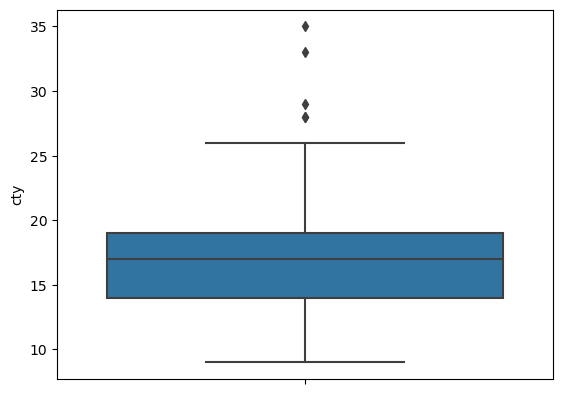

In [74]:
#Q2. 상자 그림을 이용해 cty에 이상치가 있는지 확인하세요. 상자 그림 기준으로 정상 범위를 벗어난
#값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요.
# 상자 그림 만들기
sns.boxplot(data = mpg, y = 'cty')


In [82]:
pct25 = mpg['cty'].quantile(.25)  # 1사분위수
pct75 = mpg['cty'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
print('IQR value : ', iqr)

x = pct25 - 1.5 * iqr  # 하한
print(x)

y = pct75 + 1.5 * iqr  # 상한
print(y)

IQR value :  5.0
6.5
26.5


<Axes: ylabel='cty'>

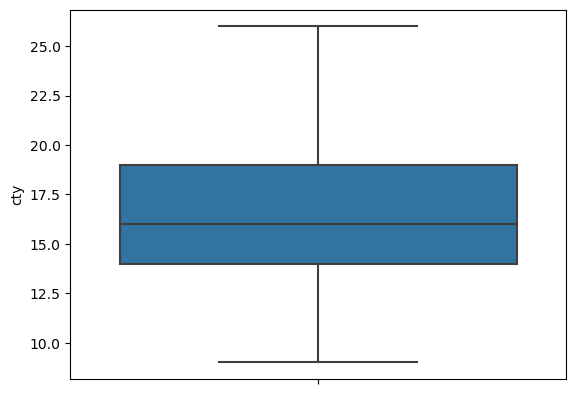

In [83]:
# 6.5 ~ 26.5 벗어나면 NaN 부여
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5), np.nan, mpg['cty'])

# 상자 그림 만들기
sns.boxplot(data = mpg, y = 'cty')

In [80]:
#Q3. 두 변수의 이상치를 결측 처리했으니 이제 분석할 차례입니다. 이상치를 제거한 다음 drv별로
#        cty 평균이 어떻게 다른지 알아보세요. 하나의 pandas 구문으로 만들어야 합니다.

mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv') \
   .agg(mean_cty = ('cty', 'mean'))


,mean_cty
drv,
4,14.330097
f,19.445545
r,14.080000
